## Lab 8
### Submitted By: Manav Doda
### Roll No.: 195057
## Importing Necessary modules

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Objective:
### Compressing Image size using Huffman Coding

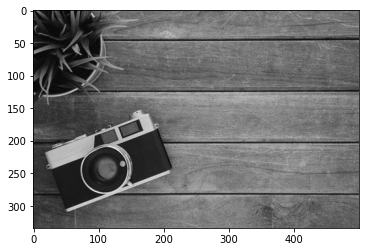

In [2]:
image = cv2.imread("testImage.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

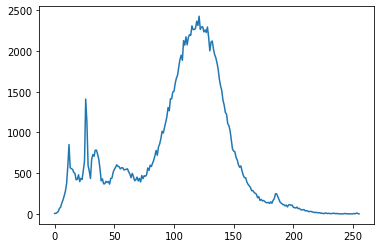

In [3]:
hist = []
for i in range(256):
    hist.append(0)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        hist[image[i][j]] += 1
plt.plot(range(256), hist)

In [4]:
class node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''
  
def printNodes(node, val=''):
    newVal = val + str(node.huff)
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")

In [5]:
nodes = []
for i in range(len(hist)):
    nodes.append(node(hist[i], i))
while len(nodes) > 1:
    nodes = sorted(nodes, key=lambda x: x.freq)
    left = nodes[0]
    right = nodes[1]
    left.huff = 0
    right.huff = 1
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
    nodes.remove(left)
    nodes.remove(right)
    nodes.append(newNode)
printNodes(nodes[0])

65 -> 00000000
233 -> 00000001000000
237 -> 000000010000010
232 -> 000000010000011
218 -> 0000000100001
3 -> 000000010001
215 -> 000000010010
214 -> 000000010011
180 -> 0000000101
168 -> 000000011
90 -> 0000001
133 -> 000001
147 -> 0000100
16 -> 00001010
49 -> 00001011
109 -> 000011
111 -> 000100
62 -> 00010100
29 -> 00010101
204 -> 00010110000
220 -> 0001011000100
222 -> 0001011000101
238 -> 0001011000110000
244 -> 0001011000110001
245 -> 0001011000110010
246 -> 0001011000110011
252 -> 0001011000110100
241 -> 00010110001101010
242 -> 00010110001101011
248 -> 00010110001101100
249 -> 00010110001101101
250 -> 00010110001101110
255 -> 0001011000110111100
240 -> 00010110001101111010
247 -> 00010110001101111011
239 -> 000101100011011111
2 -> 0001011000111
182 -> 0001011001
190 -> 0001011010
6 -> 0001011011
157 -> 00010111
131 -> 000110
132 -> 000111
108 -> 001000
92 -> 0010010
79 -> 00100110
24 -> 00100111
58 -> 00101000
167 -> 001010010
4 -> 00101001100
205 -> 00101001101
178 -> 001010011

In [6]:
def countBits(node, val=''):
    totalBitsRequired = 0
    # huffman code for current node
    newVal = val + str(node.huff)
    # if node is not an edge node
    # then traverse inside it
    if(node.left):
        totalBitsRequired+=countBits(node.left, newVal)
    if(node.right):
        totalBitsRequired+=countBits(node.right, newVal)
  
        # if node is edge node then
        # display its huffman code
    if(not node.left and not node.right):
        totalBitsRequired += hist[int(node.symbol)-1] * len(newVal)
    return totalBitsRequired

bitSizeAfterCompression = countBits(nodes[0])

In [7]:
newPixelSize = bitSizeAfterCompression/(image.shape[0]*image.shape[1])
print("Image size before compression: ", image.shape[0]*image.shape[1]*8)
print("Image size after compression:  ", bitSizeAfterCompression)
print("Number of bits reduced:        ", image.shape[0]*image.shape[1]*8-bitSizeAfterCompression)
print("Average pixel size:            ", newPixelSize)
print("Compression Ratio:             ", float(8/newPixelSize))

Image size before compression:  1336000
Image size after compression:   1211223
Number of bits reduced:         124777
Average pixel size:             7.252832335329341
Compression Ratio:              1.1030173634417444
